In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
''' Metodo delle approssimazioni successive'''
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  
  err=np.zeros(maxit+1, dtype=np.float64)
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  
  
  i= 0
  err[0]= tolx + 1
  vecErrore[0] = np.abs(x0 - xTrue)
  x = x0

  while (i < maxit and (err[i] > tolx or abs(f(x)) > tolf) ): 
    x_new= g(x)
    err[i+1]= abs(x_new - x)
    i+= 1
    x= x_new
    
  err = err[0 : i] 
  vecErrore = vecErrore[0 : i]
  return (x, i, err, vecErrore) 

In [3]:
'''creazione del problema'''
f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x)-2*x

g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)
g3 = lambda x: x-f(x)/df(x)

xTrue = -0.7034674
fTrue = f(xTrue)
print('fTrue = ', fTrue)

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

fTrue =  4.278746923436216e-08


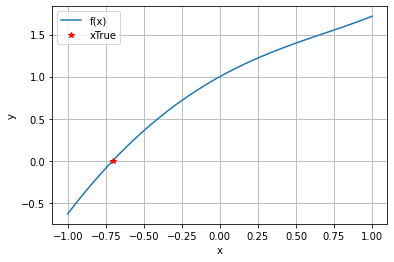

Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_new= 23
Metodo approssimazioni successive g2 
 x = -0.48775858993453886 
 iter_new= 100
Metodo approssimazioni successive g3 
 x = -0.7034674224983917 
 iter_new= 6


In [7]:
''' Grafico funzione in [-1, 1]'''
a= -1.0
b= 1.0
x_plot= np.linspace(a, b, 101)
f_plot= f(x_plot)

plt.plot(x_plot, f_plot)
plt.plot(xTrue, f(xTrue), '*', color='red')
plt.legend(("f(x)","xTrue"))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()



'''Calcolo soluzione in g1, g2 e g3'''

[sol_n, iter_n, err_n, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_n,'\n iter_new=', iter_n)

[sol_n, iter_n, err_n, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_n,'\n iter_new=', iter_n)

[sol_n, iter_n, err_n, vecErrore_g3]=succ_app(f, g3, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g3 \n x =',sol_n,'\n iter_new=', iter_n)

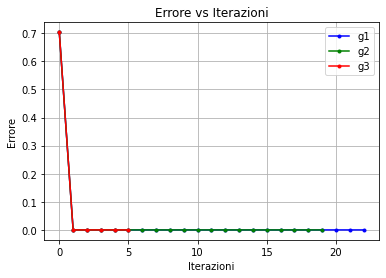

In [5]:
''' Grafico Errore vs Iterazioni'''
# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# g2
plt.plot(vecErrore_g2[:20], '.-', color='green')
# g3
plt.plot(vecErrore_g3, '.-', color='red')

plt.legend( ("g1", "g2", "g3"))
plt.xlabel('Iterazioni')
plt.ylabel('Errore')
plt.title('Errore vs Iterazioni')
plt.grid()